In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#######
from numpy import isnan
from pandas import read_csv
%matplotlib inline 

In [41]:
DF1 = pd.read_csv("C:/Users/melek/Downloads/LFB Incident data from 2009 - 2017.csv", index_col='IncidentNumber', low_memory=False)
# Display the first few rows
DF1.head()

,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
235138081.00,01-Jan-09,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1091.00,01-Jan-09,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2091.00,01-Jan-09,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3091.00,01-Jan-09,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
5091.00,01-Jan-09,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


In [16]:
# Display basic information about the dataset
print(DF1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 988279 entries, 235138081.00 to 175197-31122017
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DateOfCall                              988279 non-null  object 
 1   CalYear                                 988279 non-null  int64  
 2   TimeOfCall                              988279 non-null  object 
 3   HourOfCall                              988279 non-null  int64  
 4   IncidentGroup                           988279 non-null  object 
 5   StopCodeDescription                     988279 non-null  object 
 6   SpecialServiceType                      299101 non-null  object 
 7   PropertyCategory                        988279 non-null  object 
 8   PropertyType                            988279 non-null  object 
 9   AddressQualifier                        988279 non-null  object 
 10  Postcode_full                

In [17]:
# Check for missing values
print(DF1.isnull().sum())

DateOfCall                                     0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        689178
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             451514
Postcode_district                              0
UPRN                                      141333
USRN                                      162871
IncGeo_BoroughCode                             0
IncGeo_BoroughName                             0
ProperCase                                     0
IncGeo_WardCode                                0
IncGeo_WardName                                0
IncGeo_WardNameNew                             0
Easting_m           

In [18]:
# Summary statistics numerical columns
print(DF1.describe())

            CalYear     HourOfCall          UPRN          USRN      Easting_m  \
count  988279.00000  988279.000000  8.469460e+05  8.254080e+05  536765.000000   
mean     2012.76622      13.536951  2.384434e+10  2.022355e+07  530633.484454   
std         2.63804       6.212017  4.956566e+10  4.168085e+06   10284.552338   
min      2009.00000       0.000000  0.000000e+00  0.000000e+00  503588.000000   
25%      2010.00000       9.000000  0.000000e+00  2.040093e+07  525310.000000   
50%      2013.00000      14.000000  0.000000e+00  2.120135e+07  530782.000000   
75%      2015.00000      19.000000  1.001541e+10  2.210219e+07  536754.000000   
max      2017.00000      23.000000  2.000044e+11  9.999012e+07  560925.000000   

          Northing_m  Easting_rounded  Northing_rounded       Latitude  \
count  536765.000000    988279.000000     988279.000000  536765.000000   
mean   180368.499848    530686.961931     180520.003714      51.507063   
std      7402.412987      9715.709862       7302

In [20]:
# Summary statistics for categorical columns
print(DF1.describe(include=['object']))

       DateOfCall TimeOfCall IncidentGroup StopCodeDescription  \
count      988279     988279        988279              988279   
unique       3287      86219             3                  10   
top     23-Jun-16   19:13:59   False Alarm                 AFA   
freq          998         34        481890              355922   

       SpecialServiceType PropertyCategory  \
count              299101           988279   
unique                 21                9   
top          Lift Release         Dwelling   
freq                63505           446458   

                                             PropertyType  \
count                                              988279   
unique                                                290   
top     Purpose Built Flats/Maisonettes - 4 to 9 storeys    
freq                                               106999   

                 AddressQualifier Postcode_full Postcode_district  \
count                      988279        536765            9882

In [22]:
# Frequency count of Incident Group
print(DF1['IncidentGroup'].value_counts())


False Alarm        481890
Special Service    299104
Fire               207285
Name: IncidentGroup, dtype: int64


In [23]:
# Distribution of attendance time for the first pump
print(DF1['FirstPumpArriving_AttendanceTime'].describe())

count    896908.000000
mean        321.645404
std         142.983902
min           1.000000
25%         231.000000
50%         297.000000
75%         381.000000
max        1200.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64


In [24]:
# Distribution of 'Notional Cost (£)' column
print(DF1['Notional Cost (£)'].describe())

count    9.882790e+05
mean     3.581158e+02
std      3.221685e+03
min      2.550000e+02
25%      2.600000e+02
50%      2.900000e+02
75%      3.260000e+02
max      2.277726e+06
Name: Notional Cost (£), dtype: float64


In [34]:
# Unique values in 'PropertyType'
print(DF1['PropertyType'].unique())

['Car ' 'Lake/pond/reservoir ' 'Road surface/pavement '
 'Domestic garden (vegetation not equipment) '
 'Cycle path/public footpath/bridleway '
 'Purpose Built Flats/Maisonettes - Up to 3 storeys '
 'Refuse/rubbish tip ' 'Small refuse/rubbish container'
 'Student Hall of Residence ' 'House - single occupancy '
 'Converted Flat/Maisonette - Up to 2 storeys ' 'Loose refuse '
 'Department Store ' 'Purpose Built Flats/Maisonettes - 4 to 9 storeys '
 'Park ' 'Laundrette '
 'Purpose Built Flats/Maisonettes - 10 or more storeys ' 'Hotel/motel '
 'Restaurant/cafe' 'Other outdoor location '
 'Large refuse/rubbish container (eg skip/ paladin)' 'Museum '
 'House in Multiple Occupation - 3 or more storeys (not known if licensed)'
 'Post box ' 'Converted Flat/Maisonettes - 3 or more storeys' 'Casino '
 'Kiosk ' 'Club/night club ' 'Self contained Sheltered Housing '
 'Nursing/Care Home/Hospice' 'Hostel (e.g. for homeless people) '
 "Nurses'/Doctors' accommodation " 'Shelter '
 'Licensed House in Mul

In [42]:
# Check which columns have missing values
missing_values = DF1.isnull().sum()
missing_values

DateOfCall                                     0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        689178
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             451514
Postcode_district                              0
UPRN                                      141333
USRN                                      162871
IncGeo_BoroughCode                             0
IncGeo_BoroughName                             0
ProperCase                                     0
IncGeo_WardCode                                0
IncGeo_WardName                                0
IncGeo_WardNameNew                             0
Easting_m           

In [40]:
# drop rows where the FirstPumpArriving information is missing
df_cleaned = DF1.dropna(subset=['FirstPumpArriving_AttendanceTime']) 
df_cleaned

,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
235138081.00,01-Jan-09,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
2091.00,01-Jan-09,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3091.00,01-Jan-09,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
5091.00,01-Jan-09,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0
6091.00,01-Jan-09,2009,00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,...,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175190-31122017,31-Dec-17,2017,23:26:06,23,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,...,120.0,Heston,503.0,Feltham,2.0,2.0,2,60,328,1.0
175193-31122017,31-Dec-17,2017,23:34:55,23,False Alarm,False alarm - Good intent,NaN,Non Residential,Other building/use not known,Within same building,...,688.0,Hendon,761.0,West Hampstead,2.0,2.0,2,76,415,2.0
175194-31122017,31-Dec-17,2017,23:35:44,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,...,226.0,Paddington,244.0,Paddington,2.0,3.0,3,60,328,1.0


In [43]:
# Fill missing values with the mean value
df_filled = DF1.fillna({'FirstPumpArriving_AttendanceTime': DF1['FirstPumpArriving_AttendanceTime'].mean()})

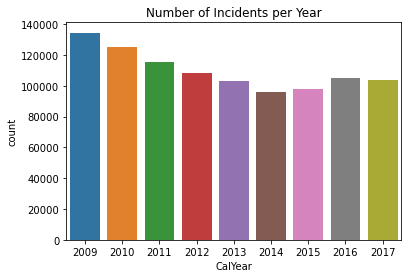

In [46]:
# Plot the distribution of incidents over the years
sns.countplot(x='CalYear', data=DF1)
plt.title('Number of Incidents per Year')
plt.show()

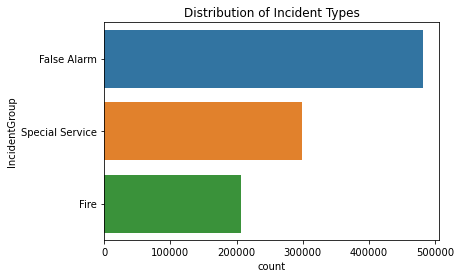

In [48]:
# Distribution of incident types
sns.countplot(y='IncidentGroup', data=DF1, order=DF1['IncidentGroup'].value_counts().index)
plt.title('Distribution of Incident Types')
plt.show()

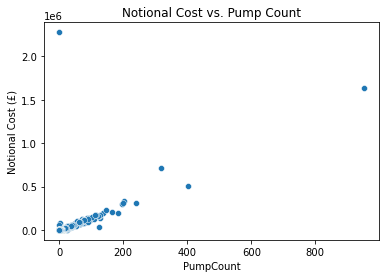

In [49]:
# Scatter plot of 'Notional Cost (£)' vs 'PumpCount'
sns.scatterplot(x='PumpCount', y='Notional Cost (£)', data=DF1)
plt.title('Notional Cost vs. Pump Count')
plt.show()

# positive correlation between the PumpCount and the notional cost, higher Pumps are associated with higher costs
# --> as more pumps are involved the costs increase

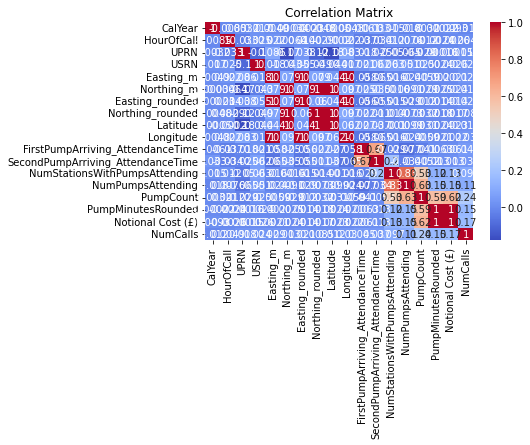

In [50]:
# Correlation matrix
correlation_matrix = DF1.corr()

# Visualization of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# this heatmap prove the results of the scatter NotinalCost vs PumpCount
# HourOfCall, Lattitude, Longitude, UPRN, USRN, CarYear seem to no have correlation or less impact on outcomes

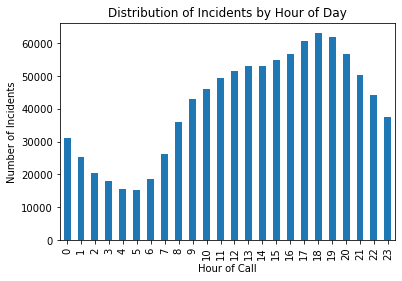

In [51]:
# Check the distribution of incidents throughout the day
hourly_distribution = DF1.groupby('HourOfCall').size()

# Plot the hourly distribution
hourly_distribution.plot(kind='bar')
plt.title('Distribution of Incidents by Hour of Day')
plt.xlabel('Hour of Call')
plt.ylabel('Number of Incidents')
plt.show()